<a href="https://colab.research.google.com/github/mdellanina/TrabajoPracticoCODERHOUSE/blob/main/TrabajoPracticoCH_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final: "Modelo para la Predicción de Nivel de Radiación Solar"


# 1. Introducción

El conjunto de datos contiene columnas como: "dirección del viento", "velocidad del viento", "humedad" y "temperatura".
El parámetro de respuesta que se va a predecir es: "Radiación_solar".
Contiene mediciones de los últimos 4 meses y hay que predecir el nivel de radiación solar.





## 1.1 About DataSet

Estos conjuntos de datos son datos meteorológicos de la estación meteorológica HI-SEAS de cuatro meses (septiembre a diciembre de 2016) entre la Misión IV y la Misión V.

Para cada conjunto de datos, los campos son:

*   Un número de fila (1-n) útil para ordenar los resultados de esta exportación.
*   La fecha time_t de UNIX (segundos desde el 1 de enero de 1970). Útil para ordenar los resultados de esta exportación con los resultados de otras exportaciones
*   La fecha en formato aaaa-mm-dd
*   La hora local del día en formato hh:mm:ss de 24 horas.
*   Los datos numéricos, si los hay (puede ser una cadena vacía)
*   Los datos de texto, si los hay (puede ser una cadena vacía)

Las unidades de cada conjunto de datos son:

*   Radiación solar: w/m^2 (watts/metro^2)
*   Temperatura: °F (grados Fahrenheit)
*   Humedad: % (porcentaje)
*   Presión barométrica: Hg (pulgada de mercurio)
*   Dirección del viento: grados
*   Velocidad del viento: mph (millas por hora)
*   Amanecer/atardecer: hora de Hawái

## 1.2 Dependencias

In [84]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from seaborn import boxplot, histplot
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
from mpl_toolkits.mplot3d import Axes3D

# Configurar Pandas para mostrar todas las filas
#pd.set_option('display.max_rows', None)

# Configurar Pandas para mostrar todas las columnas
#pd.set_option('display.max_columns', None)

## 1.3 DataSet

In [74]:
path = "https://github.com/mdellanina/TrabajoPracticoCODERHOUSE/raw/main/SolarPrediction/SolarPrediction.csv"
df = pd.read_csv(path)
display(df)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [75]:
# Analizando los datos, vemos que es necesario acomodar los datos para que se vizualicen mejor.
# El campo "UNIXTime" se pasa a formato DD-MM-YYYY
# El Campo "Data" se ajusta solo a la fecha, se saca la horas, ya que esta en el campo "Time"
df['UNIXTime']=df['UNIXTime'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%d-%m-%Y'))
df['Data']=pd.to_datetime(df['Data'], format='%m/%d/%Y %I:%M:%S %p')
display(df)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,30-09-2016,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,30-09-2016,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,30-09-2016,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,30-09-2016,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,30-09-2016,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,01-12-2016,2016-12-01,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,01-12-2016,2016-12-01,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,01-12-2016,2016-12-01,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,01-12-2016,2016-12-01,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [76]:
# El campo UNIXTime podria eliminarse, ya que es redundante (Solo es una ref de fecha global)
df = df.drop(['UNIXTime'], axis=1)
# El Campo "Data" estaba en formato dateTime y se cambia a Object para que la tome como categorica.
df['Data'] = df['Data'].astype(str)
display(df)

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,2016-12-01,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,2016-12-01,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,2016-12-01,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


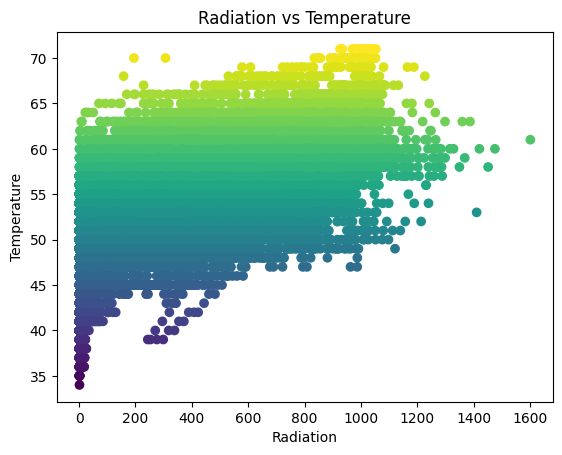

In [120]:
# @title Radiation vs Temperature

import matplotlib.pyplot as plt
plt.scatter(df['Radiation'], df['Temperature'], c=df['Temperature'], cmap='viridis')
plt.xlabel('Radiation')
plt.ylabel('Temperature')
_ = plt.title('Radiation vs Temperature')

# 2. Estadistica Descriptiva

## 2.1 Tamaño de la muestra

In [77]:
print("Este dataSet tiene la siguiente cantidad de filas y columnas: " + str(df.shape))

Este dataSet tiene la siguiente cantidad de filas y columnas: (32686, 10)


In [119]:
df['Data'] = df['Data'].astype(str)
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    32686 non-null  object 
 1   Time                    32686 non-null  object 
 2   Radiation               32686 non-null  float64
 3   Temperature             32686 non-null  int64  
 4   Pressure                32686 non-null  float64
 5   Humidity                32686 non-null  int64  
 6   WindDirection(Degrees)  32686 non-null  float64
 7   Speed                   32686 non-null  float64
 8   TimeSunRise             32686 non-null  object 
 9   TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 2.5+ MB


,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,2016-12-01,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,2016-12-01,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,2016-12-01,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


El dataset obtenido de la base de datos posee 32686 filas y 10 columnas, de las cuales 10 son variables independientes a analizar y 1 corresponde a la variable target ("Radiation")

## 2.2 Integridad de Datos

In [79]:
print("****************************************")
print("Analisis de valores duplicados: ")
print("****************************************")
print(df.duplicated().value_counts())
if "df.duplicated().value_counts() == True":
  print("\n***** No hay datos duplicados *****")
else:
  print("\n***** Hay datos duplicados *****")
print("\n****************************************")
print("Analisis de existencia de valores nulos: ")
print("****************************************")
df.info(verbose = True)
if "df.isna().value_counts() == True":
  print("\n***** No hay valores nulos *****\n")
else:
  print("\n***** Hay valores nulos *****\n")

****************************************
Analisis de valores duplicados: 
****************************************
False    32686
Name: count, dtype: int64

***** No hay datos duplicados *****

****************************************
Analisis de existencia de valores nulos: 
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    32686 non-null  object 
 1   Time                    32686 non-null  object 
 2   Radiation               32686 non-null  float64
 3   Temperature             32686 non-null  int64  
 4   Pressure                32686 non-null  float64
 5   Humidity                32686 non-null  int64  
 6   WindDirection(Degrees)  32686 non-null  float64
 7   Speed                   32686 non-null  float64
 8   TimeSunRise             32686 non-null

## 2.3 Analisis de variables numéricas

In [80]:
df.describe().round(2)

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.00,32686.0,32686.00,32686.00,32686.00,32686.00
mean,207.12,51.1,30.42,75.02,143.49,6.24
std,315.92,6.2,0.05,25.99,83.17,3.49
min,1.11,34.0,30.19,8.00,0.09,0.00
25%,1.23,46.0,30.40,56.00,82.23,3.37
50%,2.66,50.0,30.43,85.00,147.70,5.62
75%,354.24,55.0,30.46,97.00,179.31,7.87
max,1601.26,71.0,30.56,103.00,359.95,40.50


## 2.4 Analisis de variables categóricas

In [125]:
df.describe(include = 'object')

,Data,Time,TimeSunRise,TimeSunSet
count,32686,32686,32686,32686
unique,118,8299,51,56
top,2016-12-01,16:20:18,06:11:00,17:42:00
freq,288,24,1399,3682


# 3 Analisis Exploratorio de Datos (EDA)

## 3.1 Datos Erroneos o Corruptos

No hay datos erroneos ni corruptos

## 3.2 Analisis de variables numéricas

Radiation


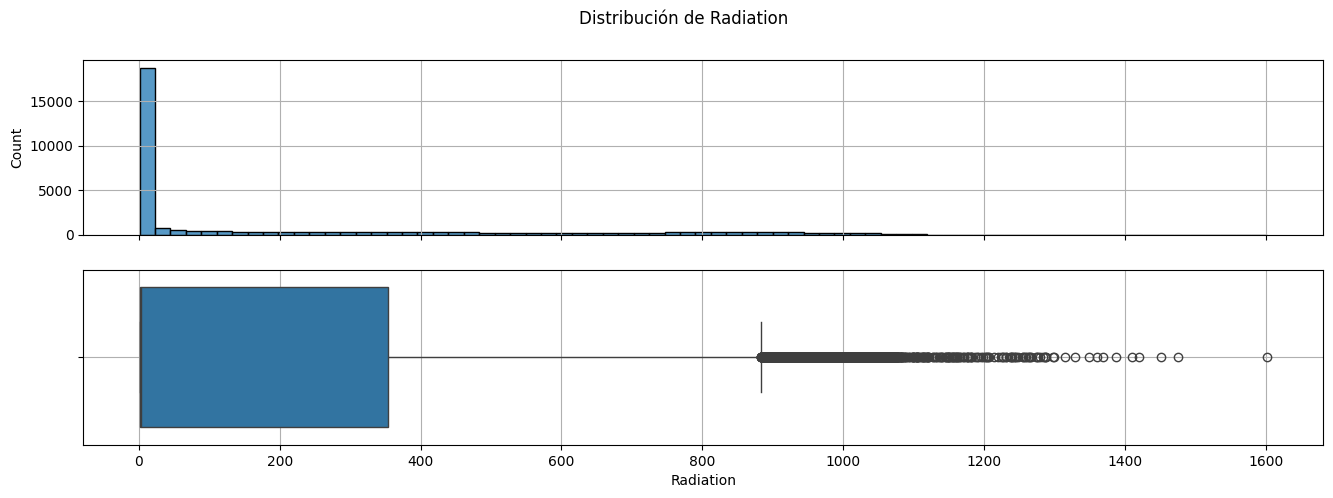

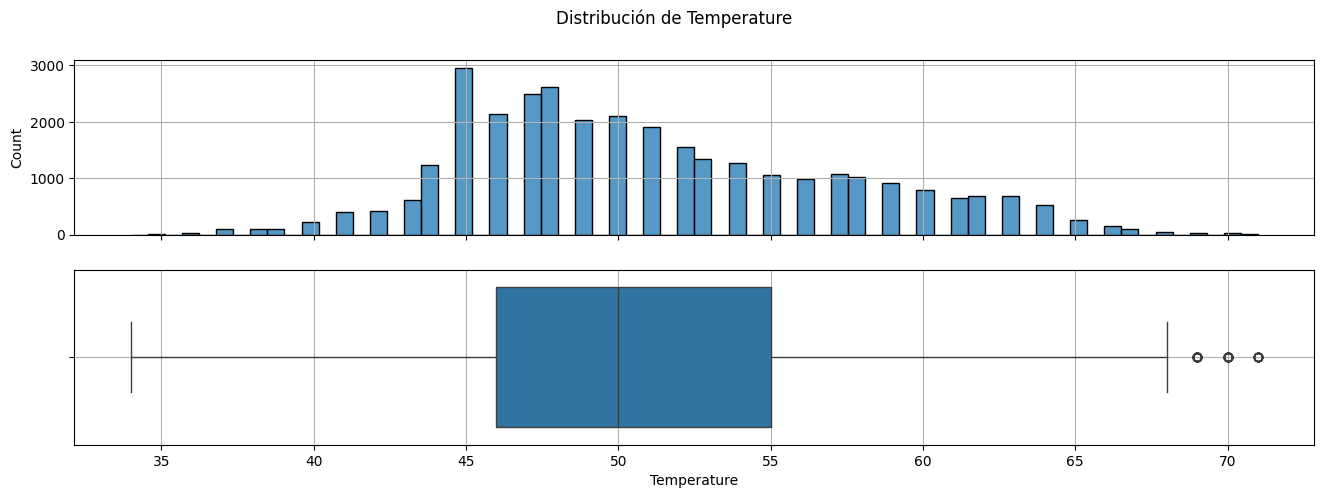

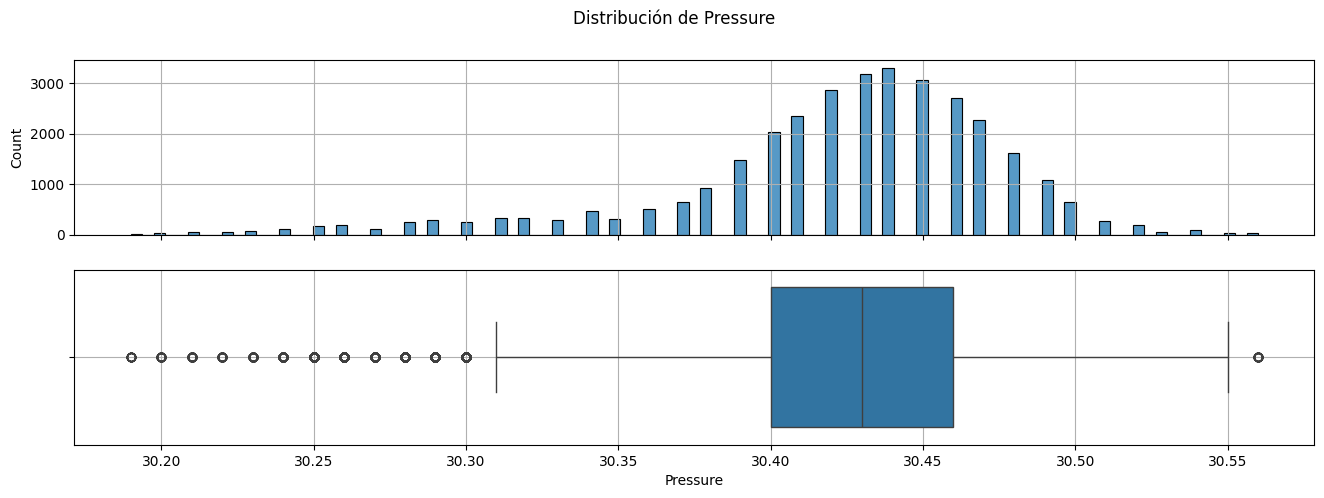

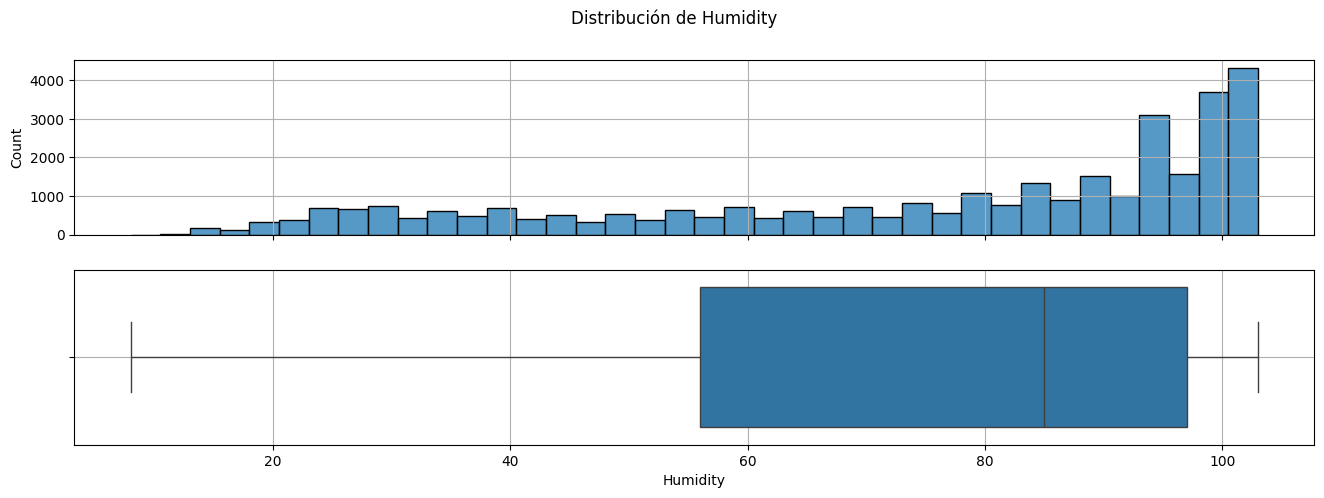

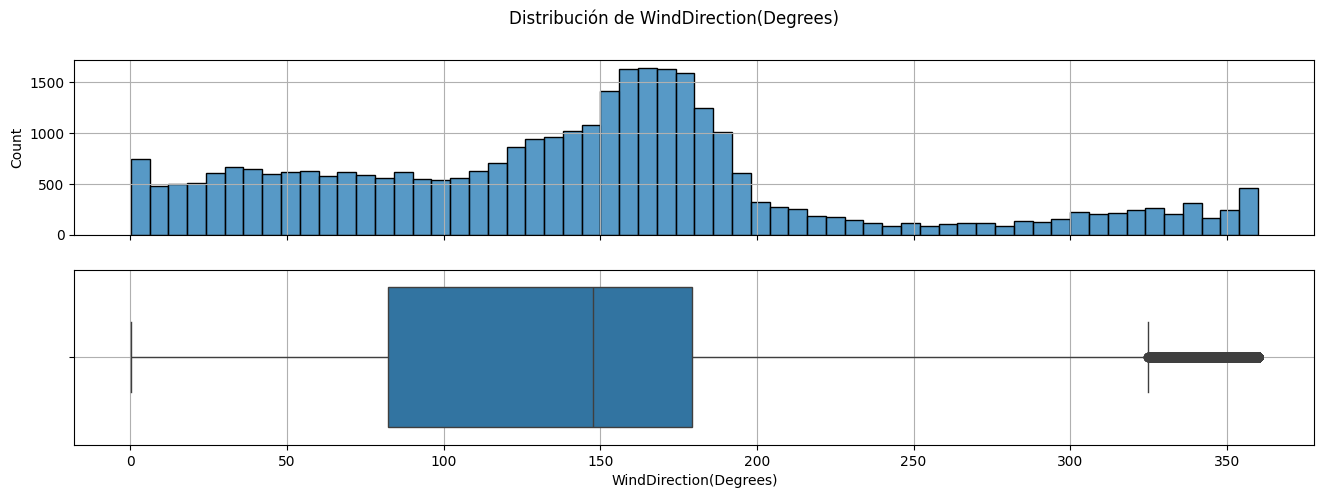

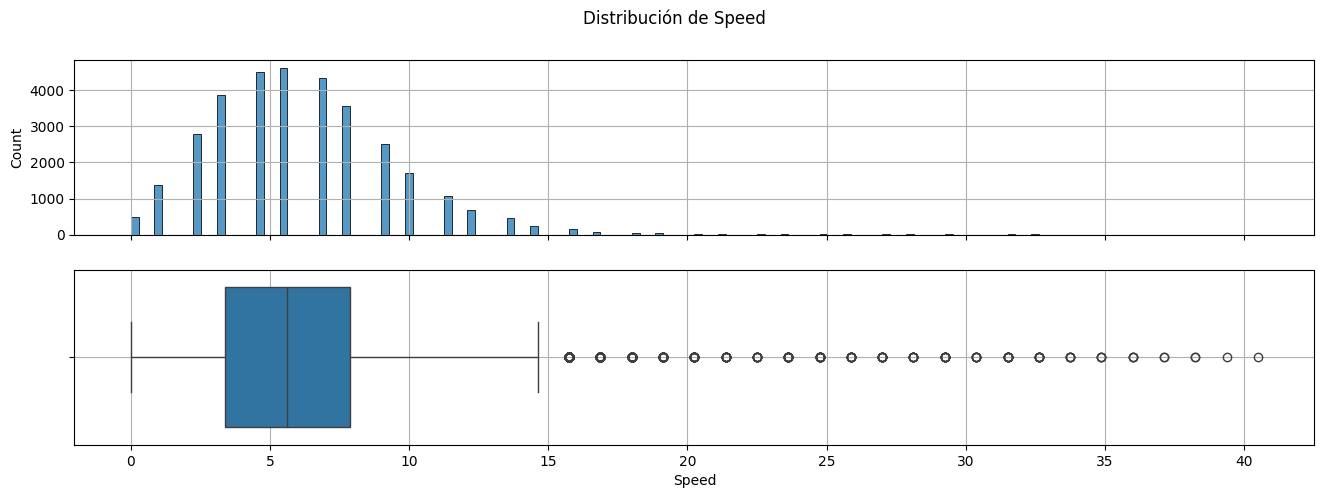

In [81]:
vars = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
print(vars[0])
for _, factores in enumerate(vars):
    fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
    fig.suptitle(f'Distribución de {factores}')
    sns.histplot(data=df, x = factores, ax = axes[0])
    sns.boxplot (x = df[factores], ax = axes[1])
    axes[0].grid()
    axes[1].grid()
    plt.show()

           Data  Radiation
0    2016-09-01    1073.71
1    2016-09-02    1062.01
2    2016-09-03    1088.09
3    2016-09-04    1601.26
4    2016-09-05    1264.07
..          ...        ...
113  2016-12-27     870.52
114  2016-12-28    1157.27
115  2016-12-29     696.30
116  2016-12-30     439.43
117  2016-12-31    1026.34

[118 rows x 2 columns]


<ipython-input-116-27294e4d5874>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45)


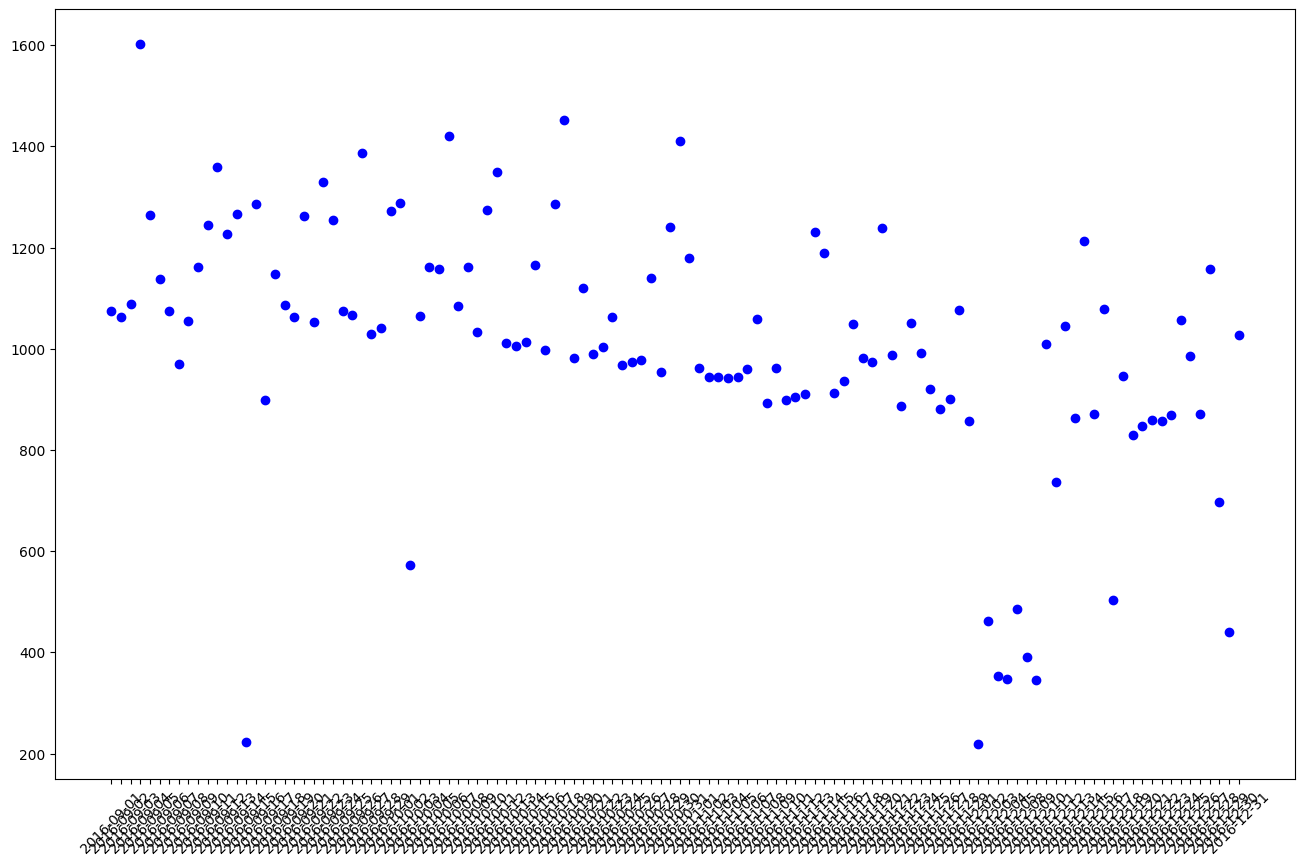

In [116]:
# Agrupamiento de datos de un mismo día, y tomar el maximo de la variable "Radiation" dentro de ese mismo dia
df_grouped = df.groupby('Data')['Radiation'].max().reset_index()
print(df_grouped)

x = df_grouped.Data
y = df_grouped.Radiation

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot the data
ax.plot(x, y, 'bo')

# Set the tick labels to be rotated 45 degrees
ax.set_xticklabels(x, rotation=45)
plt.show()


In [136]:
# prompt: ahora ademas quiero sumar al df_grouped el promedio de las temperaturas

df_grouped['Temperature'] = df.groupby('Data')['Temperature'].max().round(2).reset_index()['Temperature']
df_grouped['Pressure'] = df.groupby('Data')['Pressure'].mean().round(2).reset_index()['Pressure']
df_grouped

,Data,Radiation,Temperature,Pressure
0,2016-09-01,1073.71,63,30.44
1,2016-09-02,1062.01,65,30.45
2,2016-09-03,1088.09,63,30.44
3,2016-09-04,1601.26,62,30.45
4,2016-09-05,1264.07,64,30.42
...,...,...,...,...
113,2016-12-27,870.52,60,30.43
114,2016-12-28,1157.27,52,30.38
115,2016-12-29,696.30,50,30.33
116,2016-12-30,439.43,51,30.31
